In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#### Constants. V0 and d are from the conditions in this paper: https://web2.ph.utexas.edu/~iheds/IntroductionPlasmaPhysics/375%20P%207%20(Penning).pdf
q = 1.6e-19        # Charge (C)
m = 1.67e-27       # Electron mass (kg)
V0 = 10.0          # Voltage (V)
d =  3e-3          # Characteristic trap size (m)
B0 = 1.0           # Magnetic field (T)

In [143]:
#### DifEqs to Solve
def Penning_Eqs(t, state):
    x, y, z, vx, vy, vz = state
    v = [vx, vy, vz]
    B = [0,0,B0]

    # Radial E field (x and y only)
    E_xy = (V0 / (2 * d**2)) * np.array([x, y])

    # Cross product for Lorentz Force
    cross = np.cross(v, B)

    # Acceleration in x and y from both E and B
    ax = (q / m) * (E_xy[0] + cross[0])
    ay = (q / m) * (E_xy[1] + cross[1])

    # z is SHO
    az = -q * V0 / (m * d**2) * z

    return [vx, vy, vz, ax, ay, az]

In [144]:
#### Initial Conditions
r0 = [1e-4, 0, 1e-4]    # Initial position (x, y, z)
v0 = [0, 1000, 100]     # Initial velocity (vx, vy, vz)
initial_state = r0 + v0

#### Time Setup
t0 = 0
tf = 1e-4
t = np.linspace(t0, tf, 100000)

#### Solve Dif Eqs
solution = solve_ivp(Penning_Eqs, [t0,tf], initial_state, t_eval=t, method='RK45')
x, y, z = solution.y[0], solution.y[1], solution.y[2]
vx, vy, vz = solution.y[3], solution.y[4], solution.y[5]


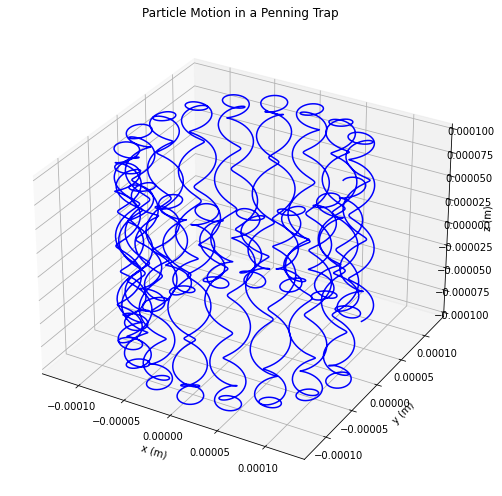

In [145]:
# Plot in 3d first
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

### If we plot all indices, the plot is completely unreadable
# ax.plot3D(x,y,z, color='blue')


ax.plot3D(x[:10000], y[:10000], z[:10000], color='blue')
ax.set_title("Particle Motion in a Penning Trap")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_zlabel("z (m)")

# Can change axis of viewing to see oscillations better
# ax.view_init(elev=0,azim=0)

plt.tight_layout()
plt.show()

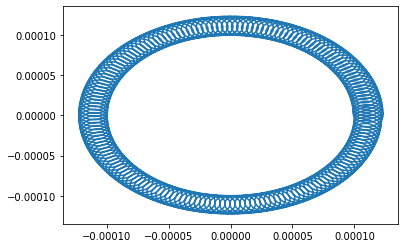

In [146]:
# Visualize both radial oscillations
plt.plot(x[:11250],y[:11250])


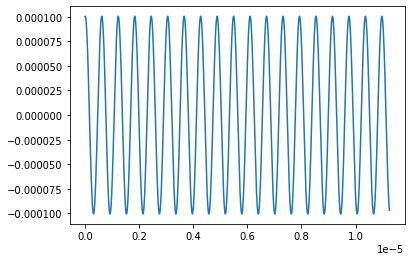

In [147]:
# Visualize the oscillation up and down the trap
plt.plot(t[:11250],z[:11250])